In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [4]:
data = pd.read_csv('jena_climate_2009_2016.csv')
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


<Axes: >

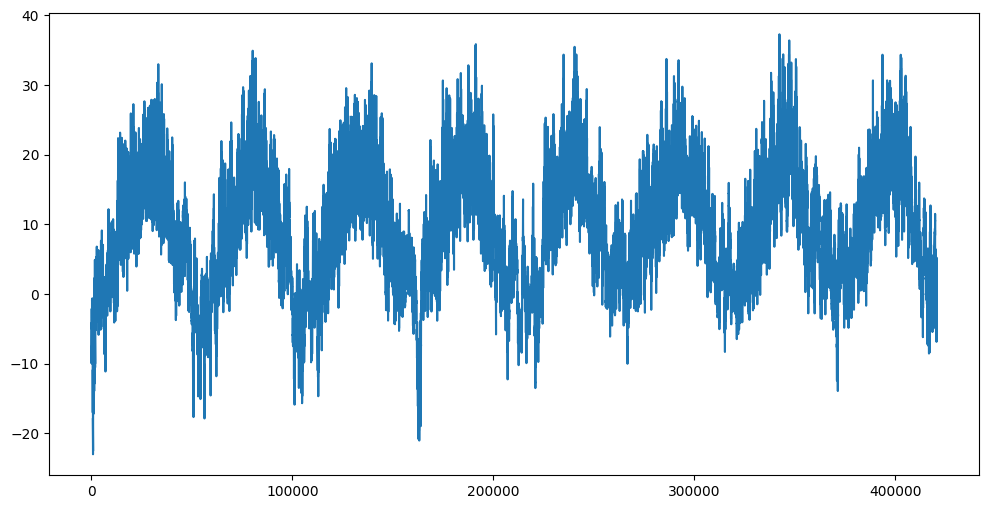

In [6]:
data['T (degC)'].plot(figsize=(12,6))

In [7]:
data.isna().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [8]:
data.duplicated().sum()

327

In [9]:
data.duplicated(subset=['Date Time']).sum()

327

In [10]:
data.index = pd.to_datetime(data['Date Time'], format = "%d.%m.%Y %H:%M:%S")
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


In [11]:
hourly = data[5::6]
hourly

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [12]:
hourly=hourly.drop_duplicates()
hourly.duplicated().sum()

0

<Axes: xlabel='Date Time'>

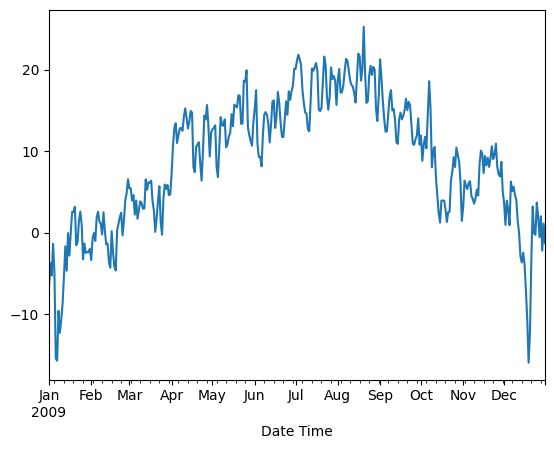

In [13]:
daily = data['T (degC)'].resample('1D').mean().interpolate('linear')
daily[0:365].plot()

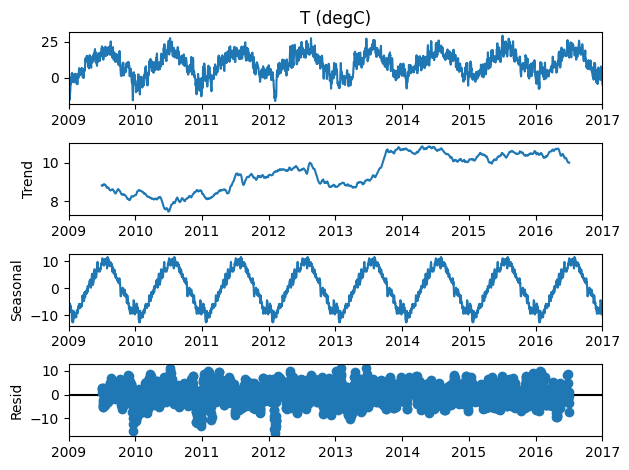

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(daily, period=365, model='additive', extrapolate_trend='freq')
result = seasonal_decompose(daily, model='additive', period=365)
result.plot();

In [15]:
# #Checking the stationarity of a series (mean and variance are constant over time)



# #Test ADF (unit root test):

#H0: The series contains a unit root - the series is non-stationary
#H1: No presence of a unit root - the series is stationary


from statsmodels.tsa.stattools import adfuller

def adf_test(daily):
    dftest = adfuller(daily, autolag='AIC')
    p_value = dftest[1]
    print("ADF: ", dftest[0])
    print("p-value: ", dftest[1])
    print("Number of Lags:  ", dftest[2])
    print("Number of Observations used for ADF Regression and Critical Values Calculation:  ", dftest[3])
    print("Critical Values:  ", dftest[4])
    print(f'\nResult: Time series is {"not" if p_value > 0.05 else ""}stationary')
    
adf_test(daily)

ADF:  -3.586923646842332
p-value:  0.006015997069563849
Number of Lags:   18
Number of Observations used for ADF Regression and Critical Values Calculation:   2904
Critical Values:   {'1%': -3.4326038187748256, '5%': -2.8625357860664167, '10%': -2.5673000851537537}

Result: Time series is stationary


In [16]:
#p-value < 0.05 - reject the null hypothesis - the series is stationary

In [17]:
# KPSS test

# #H0: Series is stationary (opposite of ADF)
# #H1: The series is non-stationary

from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print(f'Critial Values: {critical_values}')
    print(f'\nResult: Time series is {"not" if p_value < 0.05 else ""}stationary')

kpss_test(daily)

KPSS Statistic: 0.20125885264277582
p-value: 0.1
num lags: 31
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Result: Time series is stationary


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [18]:
#p-value > 0.05 - no reason to reject H0 - series is stationary

In [19]:
hourly_temp = hourly['T (degC)']
len(hourly_temp)

70067

In [20]:
#To predict what the temperature will be in 24 hours, we use the offset parameter

#[[[1],[2],[3],[4],[5]]][5+24]
#[[[2],[3],[4],[5],[6]]][6+24]
#[[[3],[4],[5],[6],[7]]][7+24]

def generator(data, window, offset):
    gen = data.to_numpy()
    X = []
    y = []
    for i in range(len(gen)-window-offset):
        row = [[a] for a in gen[i:i+window]]
        X.append(row)
        label = gen[i+window+offset-1]
        y.append(label)
    return np.array(X), np.array(y)

In [21]:
WINDOW = 5
OFFSET = 24
X, y = generator(hourly_temp, WINDOW, OFFSET)
X.shape, y.shape

((70038, 5, 1), (70038,))

In [22]:
X[0], y[0]

(array([[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]]),
 -4.96)

In [23]:
X[1], y[1]

(array([[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]]),
 -4.43)

In [24]:
hourly.head(30)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.30
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.20
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.00
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.00
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.00
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.80
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.90
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.20


In [25]:
#Train, valid and test sets

X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5038, 5, 1), (5038,))

In [26]:
#LSTM
model1 = Sequential()
model1.add(InputLayer((WINDOW, 1)))
model1.add(LSTM(100))
model1.add(Dense(64, activation="relu", kernel_regularizer="l2")),
model1.add(Dense(32, activation="relu", kernel_regularizer="l2")),
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49,617
Trainable params: 49,617
Non-trainable params: 0
_________________________________________________________________


In [27]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [28]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 23.2723 - root_mean_squared_error: 4.7070

1875/1875 [==============================] - 24s 11ms/step - loss: 23.2319 - root_mean_squared_error: 4.7027 - val_loss: 12.2154 - val_root_mean_squared_error: 3.3435
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 12.1632 - root_mean_squared_error: 3.3464 - val_loss: 12.2239 - val_root_mean_squared_error: 3.3647
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 11.9671 - root_mean_squared_error: 3.3344

1875/1875 [==============================] - 19s 10ms/step - loss: 11.9684 - root_mean_squared_error: 3.3346 - val_loss: 11.8401 - val_root_mean_squared_error: 3.3220
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 11.8309 - root_mean_squared_error: 3.3270

1875/1875 [==============================] - 30s 16ms/step - loss: 11.8348 - root_mean_squared_error: 3.3276 - val_loss: 11.5265 - val_root_mean_squared_error: 3.2869
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 11.7297 - root_mean_squared_error: 3.3221 - val_loss: 11.6205 - val_root_mean_squared_error: 3.3096
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 11.6481 - root_mean_squared_error: 3.3175

1875/1875 [==============================] - 20s 11ms/step - loss: 11.6530 - root_mean_squared_error: 3.3182 - val_loss: 11.4883 - val_root_mean_squared_error: 3.2965
Epoch 7/10
1875/1875 [==============================] - ETA: 0s - loss: 11.5807 - root_mean_squared_error: 3.3133

1875/1875 [==============================] - 22s 12ms/step - loss: 11.5807 - root_mean_squared_error: 3.3133 - val_loss: 11.3727 - val_root_mean_squared_error: 3.2850
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 11.5306 - root_mean_squared_error: 3.3113 - val_loss: 11.3885 - val_root_mean_squared_error: 3.2922
Epoch 9/10
1873/1875 [============================>.] - ETA: 0s - loss: 11.4853 - root_mean_squared_error: 3.3091

1875/1875 [==============================] - 20s 11ms/step - loss: 11.4870 - root_mean_squared_error: 3.3093 - val_loss: 11.2522 - val_root_mean_squared_error: 3.2759
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - loss: 11.4432 - root_mean_squared_error: 3.3070 - val_loss: 11.3826 - val_root_mean_squared_error: 3.2996


In [29]:
from keras.models import load_model

model1 = load_model('model1/')

158/158 [==============================] - 1s 4ms/step


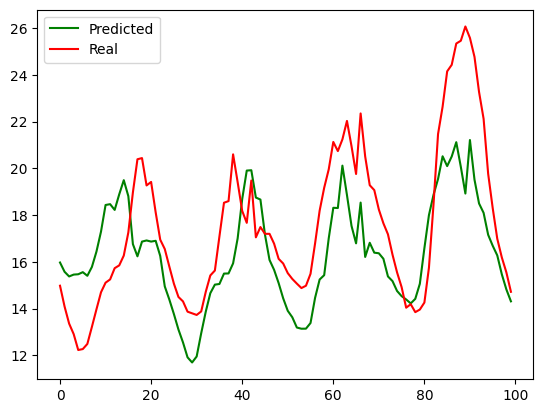

In [30]:
test_predictions = model1.predict(X_test).flatten()



result = pd.DataFrame(data={'Predicted': test_predictions, 'Real':y_test})


plt.plot(result['Predicted'][:100], "-g", label="Predicted")
plt.plot(result['Real'][:100], "-r", label="Real")
plt.legend(loc='best')

In [31]:
result['Predicted'] = result['Predicted'].shift(-OFFSET)
result

,Predicted,Real
0,14.389380,14.98
1,13.770514,14.09
2,13.107221,13.36
3,12.554702,12.91
4,11.916848,12.23
...,...,...
5033,NaN,-0.42
5034,NaN,-0.98
5035,NaN,-1.40
5036,NaN,-2.75


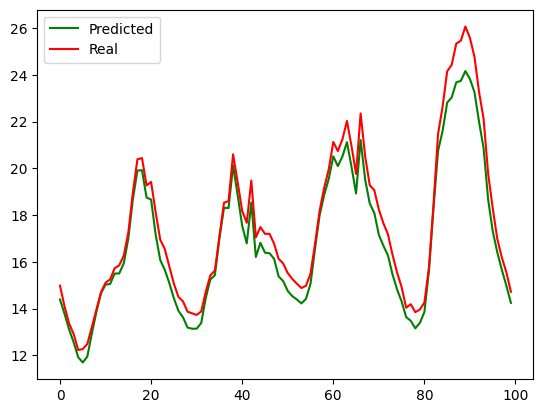

In [32]:
plt.plot(result['Predicted'][:100], "-g", label="Predicted")
plt.plot(result['Real'][:100], "-r", label="Real")
plt.legend(loc='best')

In [33]:
# Dropping last n rows using drop
result.drop(result.tail(OFFSET).index,inplace = True)
result

,Predicted,Real
0,14.389380,14.98
1,13.770514,14.09
2,13.107221,13.36
3,12.554702,12.91
4,11.916848,12.23
...,...,...
5009,1.502943,0.38
5010,1.053637,-0.78
5011,-0.091308,-1.87
5012,-0.788343,-2.08


In [35]:
result['Real'].mean()

12.70869764658955

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Calculate the R2 score
r2 = r2_score(result['Real'],result['Predicted'])

# Calculate RMSE
rmse = mean_squared_error(result['Predicted'], result['Real'], squared=False)

# Calculate MAPE
mape = np.mean(np.abs(result['Predicted'] - result['Real']))

# Print the Scores
print("R2 Score :", r2)
print("RMSE Score :", rmse)
print("MAPE Score :", mape)


R2 Score : 0.9865137418261302
RMSE Score : 0.9654275482045186
MAPE Score : 0.687172318190681
